# FunC-ESMs classification results: analysis and figures

Paper title: Decoding molecular mechanisms for loss of function variants in the human proteome

Authors: Matteo Cagiada, Nicolas Jonsson and Kresten Lindorff-Larsen

Correspondence to: K.L.-L. (lindorff@bio.ku.dk)

Notebook by: Matteo Cagiada (matteo.cagiada@bio.ku.dk)

## import libraries

In [1]:
import numpy as np ##numpy 1.26.4
import pandas as pd ## pandas 2.2.1
import scipy as sp ##scipy 1.12.0

import pickle

import matplotlib.pyplot as plt ## matplotlib 3.8
from matplotlib import ticker as mticker
import seaborn as sns ## seaborn 0.12.2

## Counting variants and residues

### all

Information from running the script: human_proteome_analysis_stats.py (step 2)

-->counting variants

Variant counts, examinated:  178987201  out of : 178987201

WT-type:  106574481  - (  0.595430736972081 % )

SBI:  43770282  - (  0.24454420067723168 % )

total-loss:  28642438  - (  0.1600250623506873 % )

-->counting residues

Residue counts, examinated:  9420379  out of:  9420379

Tolerant:  5382864  - (  0.5714063096612143 % )

Functional:  2071054  - (  0.2198482672512433 % )

Structural:  1330129  - (  0.14119697307295173 % )

Mixed:  636332  - (  0.06754845001459071 % )

In [2]:
all_proteins_variants=[60,24,16]
all_proteins_residues=[57,22,14,7]

### folded / idr residue split

Information from running the script: human_proteome_analysis_stats.py (step 3)

In [3]:
variant_tot=56814864+118334413
variant_folded_perc=118334413/variant_tot*100

In [4]:
residue_tot=2990256+6228127
residue_folded_perc=6228127/residue_tot*100

### Number from SPOT-prediction

#### variants 
ordered : 132981868, disordered: 66378193, nan: 3122320, -- : 6173139
#### positions
ordered : 6649122, disordered : 3318920, nan 156111, -- 308623]

#### idr

Variant counts, examinated:  56814864  out of : 56814864

WT-type:  47514003  - (  0.8362952870924764 % )

SBI:  8420970  - (  0.1482177269666614 % )

total-loss:  879891  - (  0.015486985940862237 % )

-->counting residues

Residue counts, examinated:  2990256  out of:  2990256

Tolerant:  2508719  - (  0.8389646237646543 % )

Functional:  402870  - (  0.13472759522930478 % )

Structural:  27831  - (  0.009307229882658877 % )

Mixed:  50836  - (  0.017000551123382078 % )

In [5]:
idr_selection_variants=[84,15,1]
idr_selection_residues=[84,14,1,2]

#### folded

Variant counts, examinated:  118334413  out of : 118334413

WT-type:  56764321  - (  0.47969411062190337 % )

SBI:  34540482  - (  0.29188873400673393 % )

total-loss:  27029610  - (  0.22841715537136267 % )

-->counting residues

Residue counts, examinated:  6228127  out of:  6228127

Tolerant:  2758629  - (  0.44293075590783554 % )

Functional:  1632914  - (  0.262183799399081 % )

Total-Loss:  1267594  - (  0.2035273204929829 % )

Mixed:  568990  - (  0.0913581242001006 % )

In [6]:
folded_selection_variants=[48,29,23]
folded_selection_residues=[44,26,21,9]

## Plot percentages

### variants 

(0.0, 100.0)

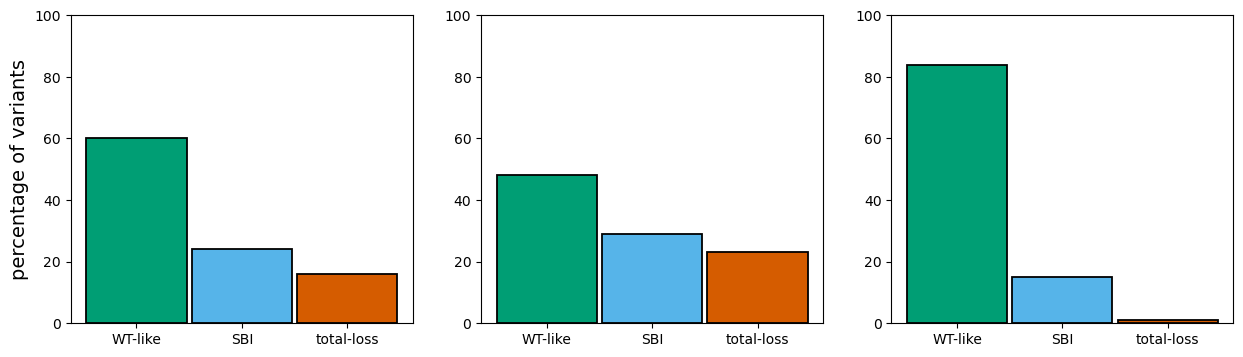

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

ax1.bar(['WT-like','SBI','total-loss'], all_proteins_variants,color=['#009e74','#56b4e9','#d55c00'],edgecolor='k',width=0.95,lw=1.3)
ax1.set_ylim(0,100)
ax1.set_ylabel('percentage of variants',fontsize=14)

ax2.bar(['WT-like','SBI','total-loss'], folded_selection_variants,color=['#009e74','#56b4e9','#d55c00'],edgecolor='k',width=0.95,lw=1.3)
ax2.set_ylim(0,100)

ax3.bar(['WT-like','SBI','total-loss'], idr_selection_variants,color=['#009e74','#56b4e9','#d55c00'],edgecolor='k',width=0.95,lw=1.3)
ax3.set_ylim(0,100)

#plt.savefig('./all_fm_classes_variants.pdf')

In [8]:
###  residues

(0.0, 100.0)

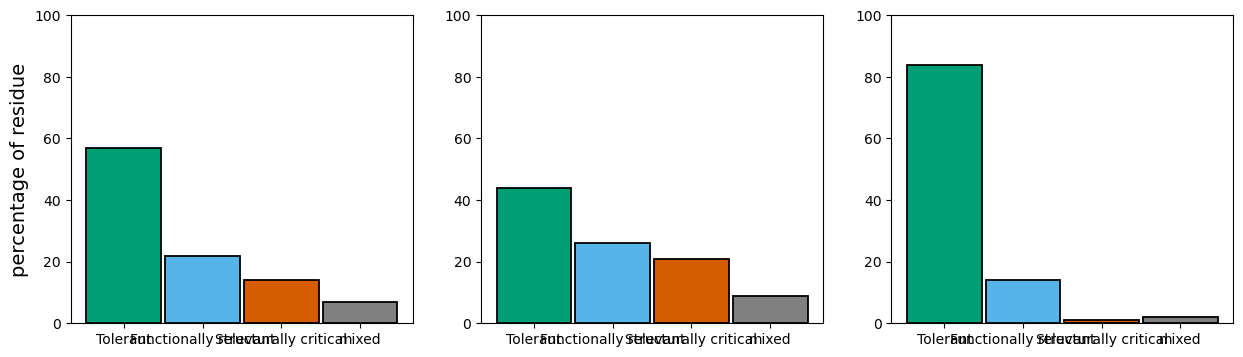

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

ax1.bar(['Tolerant','Functionally relevant','Structurally critical','mixed'], all_proteins_residues,color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k',width=0.95,lw=1.3)
ax1.set_ylim(0,100)
ax1.set_ylabel('percentage of residue',fontsize=14)

ax2.bar(['Tolerant','Functionally relevant','Structurally critical','mixed'], folded_selection_residues,color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k',width=0.95,lw=1.3)
ax2.set_ylim(0,100)

ax3.bar(['Tolerant','Functionally relevant','Structurally critical','mixed'], idr_selection_residues,color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k',width=0.95,lw=1.3)
ax3.set_ylim(0,100)

#plt.savefig('../figures_esms/all_fm_classes_residues.pdf')

## Folded regions AA start-end analysis

Information from running the script: human_proteome_analysis_stats.py (step 5)

In [10]:
amino_acids=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

In [11]:
folded_amino_acid_variant_stats=np.load('../data/data_human_prot_analysis//folded_amino_variant_count_classes.npy')

### normalised by bin

In [12]:
a=folded_amino_acid_variant_stats.astype(float)
b=np.sum(folded_amino_acid_variant_stats[:,:],axis=-1).astype(float)
normalized_amino_acid_variants=np.empty((20,20,6),dtype=float)
for idx in range(0,6):
    normalized_amino_acid_variants[:,:,idx]=np.divide(a[:,:,idx], b, out=np.zeros_like(a[:,:,idx]), where=b!=0)*100

Text(0.5, 0, 'mutation')

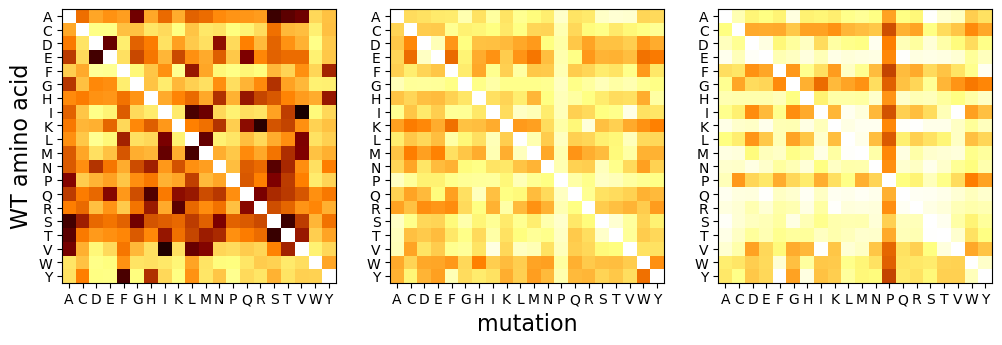

In [13]:
fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(12,4))

ax1.imshow(normalized_amino_acid_variants[:,:,0],cmap='afmhot_r',vmax=100,vmin=0)

ax1.set_yticks([i for i in range(0,20)])
ax1.set_yticklabels(amino_acids)
ax1.set_xticks([i for i in range(0,20)])
ax1.set_xticklabels(amino_acids)

ax2.imshow(normalized_amino_acid_variants[:,:,1],cmap='afmhot_r',vmax=100,vmin=0)

ax2.set_yticks([i for i in range(0,20)])
ax2.set_yticklabels(amino_acids)
ax2.set_xticks([i for i in range(0,20)])
ax2.set_xticklabels(amino_acids)

ax3.imshow(normalized_amino_acid_variants[:,:,2],cmap='afmhot_r',vmax=100,vmin=0)

ax3.set_yticks([i for i in range(0,20)])
ax3.set_yticklabels(amino_acids)
ax3.set_xticks([i for i in range(0,20)])
ax3.set_xticklabels(amino_acids)


ax1.set_ylabel("WT amino acid",fontsize=16)
ax2.set_xlabel("mutation",fontsize=16)

#plt.savefig('../figures_esms/norm_folded_amino_acid_variant_stats.pdf')

### normalised by row

In [14]:
a=folded_amino_acid_variant_stats.astype(float)

normalized_amino_acid_variants=np.empty((20,20,6),dtype=float)
for idx in range(0,6):
    b=np.sum(a[:,:,idx])
    normalized_amino_acid_variants[:,:,idx]=a[:,:,idx]

Text(0.5, 0, 'mutation')

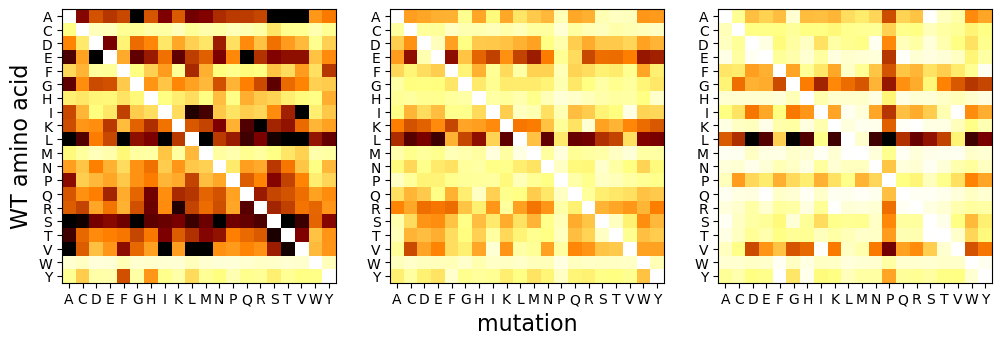

In [15]:
fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(12,4))

ax1.imshow(normalized_amino_acid_variants[:,:,0],cmap='afmhot_r',vmax=300000,vmin=0)

ax1.set_yticks([i for i in range(0,20)])
ax1.set_yticklabels(amino_acids)
ax1.set_xticks([i for i in range(0,20)])
ax1.set_xticklabels(amino_acids)

ax2.imshow(normalized_amino_acid_variants[:,:,1],cmap='afmhot_r',vmax=300000,vmin=0)

ax2.set_yticks([i for i in range(0,20)])
ax2.set_yticklabels(amino_acids)
ax2.set_xticks([i for i in range(0,20)])
ax2.set_xticklabels(amino_acids)

ax3.imshow(normalized_amino_acid_variants[:,:,2],cmap='afmhot_r',vmax=300000,vmin=0)

ax3.set_yticks([i for i in range(0,20)])
ax3.set_yticklabels(amino_acids)
ax3.set_xticks([i for i in range(0,20)])
ax3.set_xticklabels(amino_acids)


ax1.set_ylabel("WT amino acid",fontsize=16)
ax2.set_xlabel("mutation",fontsize=16)

#plt.savefig('../figures_esms/folded_amino_acid_variant_stats.pdf')

## Folded regions residue amino acid type analysis

Information from running the script: human_proteome_analysis_stats.py (step 4)

In [16]:
amino_acid_stats=np.load('../data/data_human_prot_analysis/folded_amino_count_classes.npy')
amino_acid_stats=np.delete(amino_acid_stats,[3],1)

In [17]:
df = pd.DataFrame(amino_acid_stats,columns=['tolerant','functional','structural','mixed'], index=amino_acids)

### row counts

(0.0, 400000.0)

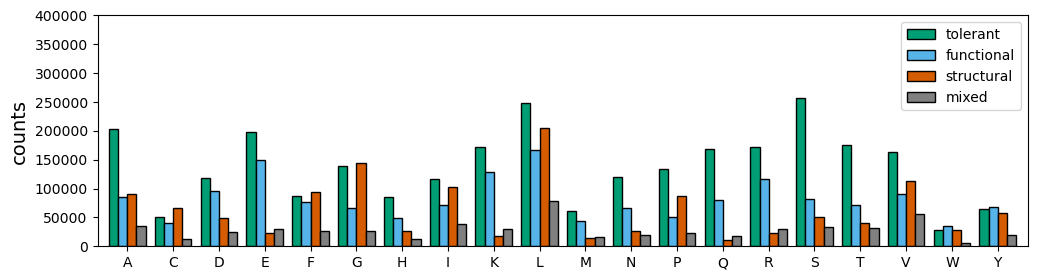

In [18]:
fig,ax=plt.subplots(1,1,figsize=(12,3))

df.plot.bar(rot=0,ax=ax,color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k',width=0.8)
ax.set_ylabel("counts",fontsize=14)
ax.set_ylim(0,400000)
#plt.savefig('../figures_esms/folded_amino_acid_residue_stats.pdf')

### percentages per aa type

In [19]:
normalized_folded_residue=(amino_acid_stats.T/np.sum(amino_acid_stats,axis=-1)).T*100

In [20]:
df = pd.DataFrame(normalized_folded_residue,columns=['tolerant','functional','structural','mixed'], index=amino_acids)

(0.0, 100.0)

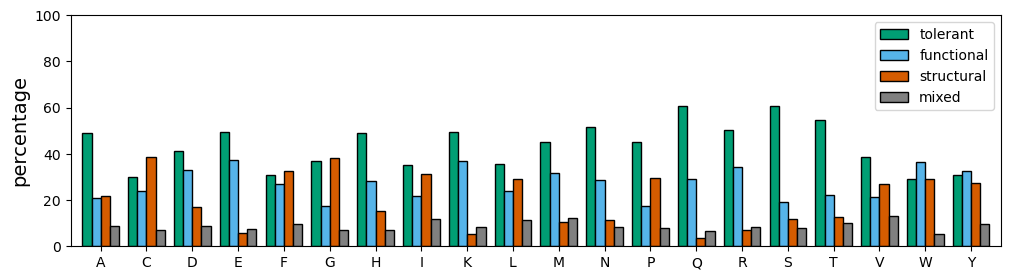

In [21]:
fig,ax=plt.subplots(1,1,figsize=(12,3))

df.plot.bar(rot=0,ax=ax,color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k',width=0.8)
ax.set_ylabel("percentage",fontsize=14)
ax.set_ylim(0,100)

#plt.savefig('../figures_esms/folded_amino_acid_residue_normalized.pdf')

## Buried/exposure folded region analysis

Information from running the script: human_proteome_analysis_stats.py (step 6)

In [22]:
df_exposure=pd.read_pickle('../data/data_human_prot_analysis/folded_stats_exposure_fm_df.pkl.gz')

In [23]:
df_exposed=df_exposure.query('exposure_rASA > 0.20')

In [24]:
df_buried=df_exposure.query('exposure_rASA < 0.20')

In [25]:
counts_exposure=np.zeros((5,2),dtype=int)

In [26]:
for fmr in df_exposed['funcModel_predicted_class_residue'].to_numpy():
    if not np.isnan(fmr):
        try:
            counts_exposure[int(fmr),0]+=1
        except:
            pass

In [27]:
for fmr in df_buried['funcModel_predicted_class_residue'].to_numpy():
    if not np.isnan(fmr):
        try:
            counts_exposure[int(fmr),1]+=1
        except:
            pass

In [28]:
exposure_norm_rasa=counts_exposure/np.sum(counts_exposure,axis=0)
exposure_norm_rasa=np.delete(exposure_norm_rasa,3,0)

/var/folders/8w/2dqxrgsd4vj00wv819dcz51w0000gn/T/ipykernel_56754/3460813967.py:1: RuntimeWarning: invalid value encountered in divide
  exposure_norm_rasa=counts_exposure/np.sum(counts_exposure,axis=0)


In [29]:
exposure_norm_class=(counts_exposure.T/np.sum(counts_exposure,axis=1)).T
exposure_norm_class=np.delete(exposure_norm_class,3,0)

/var/folders/8w/2dqxrgsd4vj00wv819dcz51w0000gn/T/ipykernel_56754/2143932416.py:1: RuntimeWarning: invalid value encountered in divide
  exposure_norm_class=(counts_exposure.T/np.sum(counts_exposure,axis=1)).T


### plots percentage classes in buried/exposed normalised to total in the buried/exposed division

(0.0, 1.0)

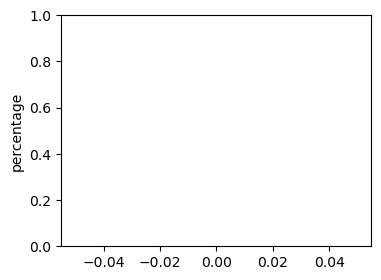

In [30]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.bar([0,1,2,3],exposure_norm_rasa[:,1],color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k')
ax.set_ylabel('percentage')
ax.set_ylim(0,1)
#plt.savefig('../figures_esms/buried_percentage_norm_rasa.pdf')

(0.0, 1.0)

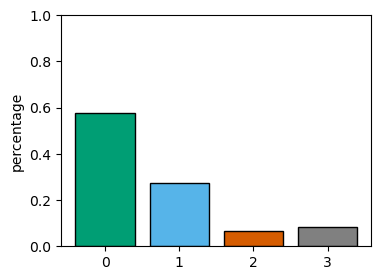

In [31]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.bar([0,1,2,3],exposure_norm_rasa[:,0],color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k')
ax.set_ylabel('percentage')
ax.set_ylim(0,1)
#plt.savefig('../figures_esms/exposed_percentage_norm_rasa.pdf')

### plots percentage classes in buried/exposed normalised to total of each class

(0.0, 1.0)

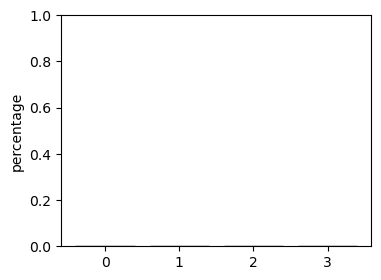

In [32]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.bar([0,1,2,3],exposure_norm_class[:,1],color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k')
ax.set_ylabel('percentage')
ax.set_ylim(0,1)
#plt.savefig('../figures_esms/buried_percentage_norm_classes.pdf')

(0.0, 1.0)

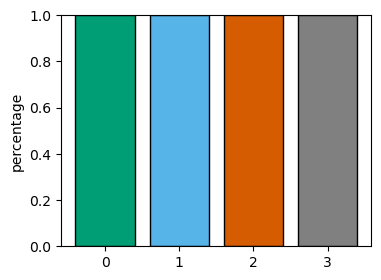

In [33]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.bar([0,1,2,3],exposure_norm_class[:,0],color=['#009e74','#56b4e9','#d55c00','gray'],edgecolor='k')
ax.set_ylabel('percentage')
ax.set_ylim(0,1)
#plt.savefig('../figures_esms/exposed_percentage_norm_classes.pdf')

### half sphere exposure

In [34]:
hse_u_tl=df_exposed.query('funcModel_predicted_class_residue == 2')['exposure_HSE_U'].to_numpy()

In [35]:
hse_d_tl=df_exposed.query('funcModel_predicted_class_residue == 2')['exposure_HSE_D'].to_numpy()

In [36]:
hse_u_sbi=df_exposed.query('funcModel_predicted_class_residue == 1')['exposure_HSE_U'].to_numpy()

In [37]:
hse_d_sbi=df_exposed.query('funcModel_predicted_class_residue == 1')['exposure_HSE_D'].to_numpy()

In [38]:
hse_u_wt=df_exposed.query('funcModel_predicted_class_residue == 0')['exposure_HSE_U'].to_numpy()

In [39]:
hse_d_wt=df_exposed.query('funcModel_predicted_class_residue == 0')['exposure_HSE_D'].to_numpy()

In [40]:
z,x_edges,y_edges=np.histogram2d(hse_u_wt,hse_d_wt,range=((0,30),(0,30)),bins=30)

In [41]:
x=(x_edges[1:]+x_edges[:-1])/2
y=(y_edges[1:]+y_edges[:-1])/2

/Users/bqm193/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bqm193/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bqm193/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


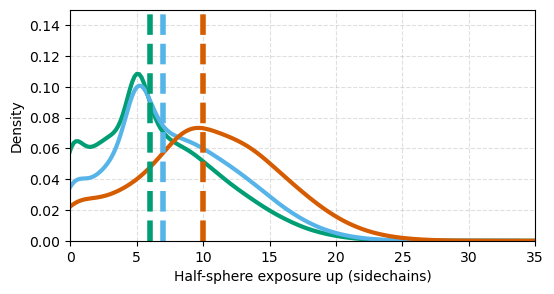

In [42]:
fig,ax=plt.subplots(1,1,figsize=(6,3))
sns.kdeplot(data=df_exposed.query('funcModel_predicted_class_residue == 0')["exposure_HSE_U"],bw_adjust=3,ax=ax,color='#009e74',lw=3,
           clip=(-0.1, 35.0))
sns.kdeplot(data=df_exposed.query('funcModel_predicted_class_residue == 1')["exposure_HSE_U"],bw_adjust=3,ax=ax,color='#56b4e9',lw=3,
           clip=(-0.1, 35.0))
sns.kdeplot(data=df_exposed.query('funcModel_predicted_class_residue == 2')["exposure_HSE_U"],bw_adjust=3,ax=ax,color='#d55c00',lw=3,
           clip=(-0.1, 35.0))

ax.plot([np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 0')["exposure_HSE_U"].to_numpy()),np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 0')["exposure_HSE_U"].to_numpy())],[0,2],
       color='#009e74',lw=4,ls='--')

ax.plot([np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 1')["exposure_HSE_U"].to_numpy()),np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 1')["exposure_HSE_U"].to_numpy())],[0,2],
       color='#56b4e9',lw=4,ls='--')

ax.plot([np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 2')["exposure_HSE_U"].to_numpy()),np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 2')["exposure_HSE_U"].to_numpy())],[0,2],
       color='#d55c00',lw=4,ls='--')

ax.set_ylabel('Density')
ax.set_xlabel('Half-sphere exposure up (sidechains)')
ax.set_xlim((0,35))
ax.set_ylim((0,0.15))

ax.grid(axis='both',alpha=0.4,ls='--')
ax.set_axisbelow(True)

#fig.savefig('../figures_esms/contourn_HDE_Uhisto.pdf')

/Users/bqm193/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bqm193/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bqm193/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


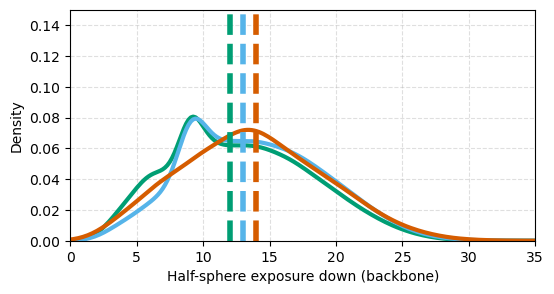

In [43]:
fig,ax=plt.subplots(1,1,figsize=(6,3))
sns.kdeplot(data=df_exposed.query('funcModel_predicted_class_residue == 0')["exposure_HSE_D"],bw_adjust=3,ax=ax,color='#009e74',lw=3,
           clip=(-0.1, 35.0))
sns.kdeplot(data=df_exposed.query('funcModel_predicted_class_residue == 1')["exposure_HSE_D"],bw_adjust=3,ax=ax,color='#56b4e9',lw=3,
           clip=(-0.1, 35.0))
sns.kdeplot(data=df_exposed.query('funcModel_predicted_class_residue == 2')["exposure_HSE_D"],bw_adjust=3,ax=ax,color='#d55c00',lw=3,
           clip=(-0.1, 35.0))

ax.plot([np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 0')["exposure_HSE_D"].to_numpy()),np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 0')["exposure_HSE_D"].to_numpy())],[0,2],
       color='#009e74',lw=4,ls='--')

ax.plot([np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 1')["exposure_HSE_D"].to_numpy()),np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 1')["exposure_HSE_D"].to_numpy())],[0,2],
       color='#56b4e9',lw=4,ls='--')

ax.plot([np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 2')["exposure_HSE_D"].to_numpy()),np.nanmedian(df_exposed.query('funcModel_predicted_class_residue == 2')["exposure_HSE_D"].to_numpy())],[0,2],
       color='#d55c00',lw=4,ls='--')

ax.set_ylabel('Density')
ax.set_xlabel('Half-sphere exposure down (backbone)')
ax.set_xlim((0,35))
ax.set_ylim((0,0.15))

ax.grid(axis='both',alpha=0.4,ls='--')
ax.set_axisbelow(True)

#fig.savefig('../figures_esms/contourn_HDE_Dhisto.pdf')

## Class residue vs protein length

Information from running the script: human_proteome_analysis_rdf.py (step 2)

In [44]:
statistic_proteins=np.load('../data/data_human_prot_analysis/statistic_funct_protein_size.npz')

In [45]:
cluster_stats=pd.DataFrame({'uniprots':statistic_proteins['uniprot_analyzed'],
                            'prots_size':statistic_proteins['protein_size'],
                           'max_dist':statistic_proteins['max_internal_dist'],
                           'number_funct_sites':statistic_proteins['number_funct_sites'],
                           'funct_sites_norm': statistic_proteins['number_funct_sites']/statistic_proteins['protein_size']*100,
                           'number_tl_sites':statistic_proteins['number_tl_sites'],
                           'tl_sites_norm': statistic_proteins['number_tl_sites']/statistic_proteins['protein_size']*100})

In [46]:
### ranges clusters 0-100, 100-250, 250-500, 500-800,800-1200,1200-1500,1500-2000,2000-3000
clusters_number_np = pd.cut(
    cluster_stats['prots_size'],
    [0, 100, 250, 500,3000],
    labels=[0, 1, 2, 3]).to_numpy()

cluster_stats['cluster_number']=clusters_number_np

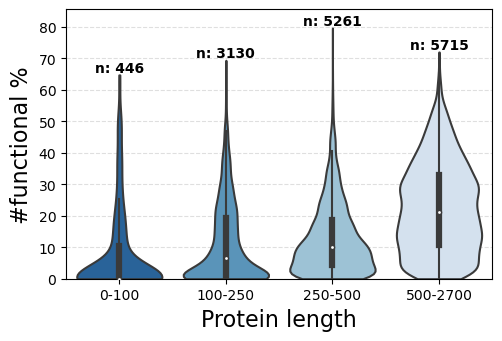

In [47]:
fig,ax=plt.subplots(1,1,figsize=(5.5,3.5))
                    
sns.violinplot(x="cluster_number", y="funct_sites_norm",
            data=cluster_stats, ax=ax,scale='width',cut=0,palette='Blues_r')

medians = cluster_stats.groupby(['cluster_number'])['funct_sites_norm'].max().values
nobs = np.flip(cluster_stats['cluster_number'].value_counts().values)
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1, nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='k',
            weight='semibold')


ymin, ymax = ax.get_ylim()

ax.set_xticks(np.arange(0,4,1))
ax.set_xticklabels(['0-100', '100-250', '250-500', '500-2700'])
ax.set_xlabel('Protein length',fontsize=16)
ax.set_ylabel('#functional %',fontsize=16)
ax.set_ylim(0,ymax+2)
ax.grid(axis='y',alpha=0.4,ls='--')
ax.set_axisbelow(True)
#plt.savefig('../figures_esms/cluster_funct_site_vs_length.pdf')

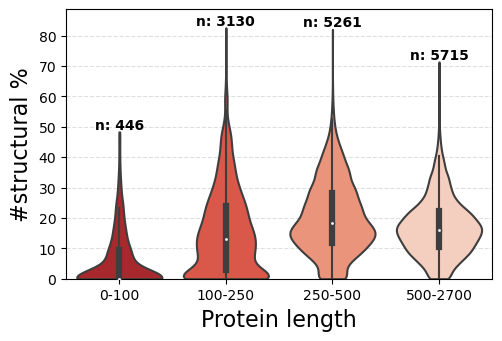

In [48]:
fig,ax=plt.subplots(1,1,figsize=(5.5,3.5))
                    
sns.violinplot(x="cluster_number", y="tl_sites_norm",
            data=cluster_stats, ax=ax,scale='width',cut=0,palette='Reds_r')

medians = cluster_stats.groupby(['cluster_number'])['tl_sites_norm'].max().values
nobs = np.flip(cluster_stats['cluster_number'].value_counts().values)
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1, nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='k',
            weight='semibold')

ymin, ymax = ax.get_ylim()

ax.set_xticks(np.arange(0,4,1))
ax.set_xticklabels(['0-100', '100-250', '250-500', '500-2700'])
ax.set_xlabel('Protein length',fontsize=16)
ax.set_ylabel('#structural %',fontsize=16)
ax.set_ylim(0,ymax+2)
ax.grid(axis='y',alpha=0.4,ls='--')
ax.set_axisbelow(True)
#plt.savefig('../figures_esms/cluster_tl_site_vs_length.pdf')

## cluster analysis functionally relevant residues

Information from running the script: human_proteome_analysis_rdf.py (step 3)

In [49]:
hist_cluster_proteins=np.load('../data/data_human_prot_analysis/hist_cluster_analysis_human_proteome_rg.npz')

In [50]:
filedic = dict(hist_cluster_proteins)

In [51]:
real_funct_res_hist=hist_cluster_proteins['real_funct_sites_hist_mean']

In [52]:
shuffled_funct_res_hist=hist_cluster_proteins['shuffled_funct_sites_hist_mean']

In [53]:
real_struct_res_hist=hist_cluster_proteins['real_totalloss_sites_hist_mean']

In [54]:
bins_hist_cluster=hist_cluster_proteins['bins']
median_bins_hist_cluster=(bins_hist_cluster[:-1]+bins_hist_cluster[1:])/2

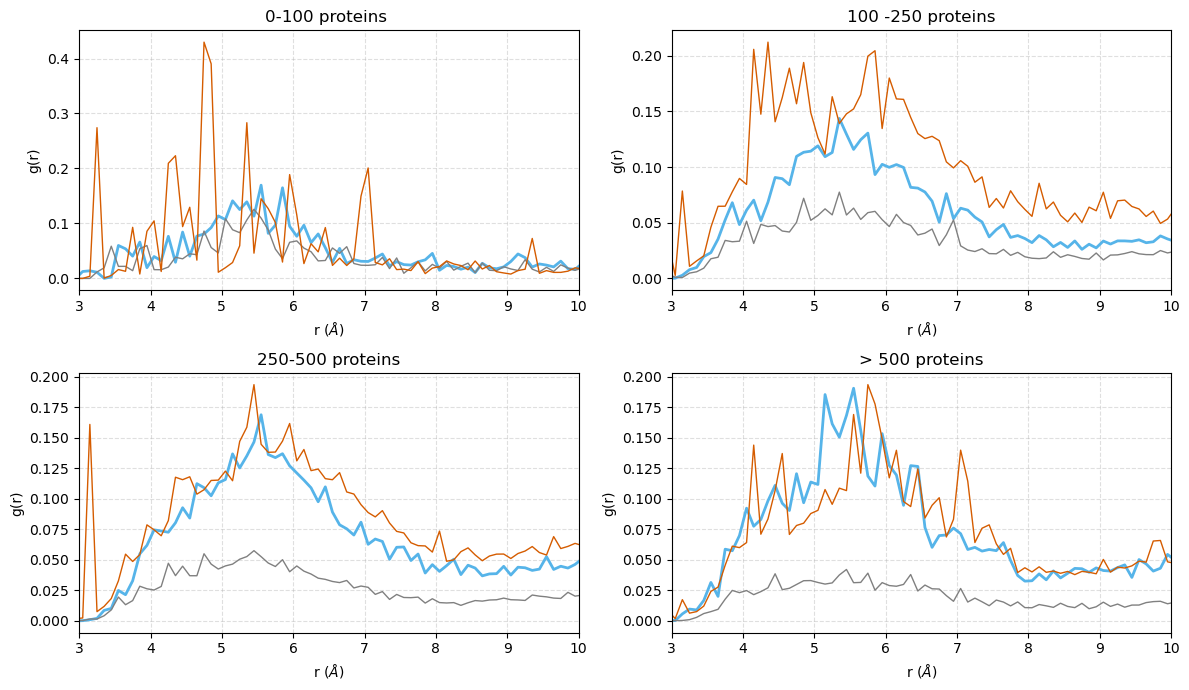

In [55]:
fig,axs=plt.subplots(2,2,figsize=(12,7))

ax_up_lim=[100,100,125,150]
ax_titles=['0-100 proteins ','100 -250 proteins','250-500 proteins','> 500 proteins']

for idx,ax in enumerate(axs.reshape(-1)):

    ax.plot(median_bins_hist_cluster,real_funct_res_hist[:,idx],c='#56b4e9',lw=2,label='fsites')
    ax.plot(median_bins_hist_cluster,shuffled_funct_res_hist[:,idx],c='gray',lw=1,label='shuffled')
    ax.plot(median_bins_hist_cluster,real_struct_res_hist[:,idx],c='#d55c00',lw=1,label='tl')

    ymin, ymax = ax.get_ylim()
    ax.set_xlim(3,10)
    ax.set_ylabel('g(r)')
    ax.set_xlabel(r'r ($\AA$)')
    ax.set_title(ax_titles[idx],fontsize=12)
    ax.grid(axis='both',alpha=0.4,ls='--')
    ax.set_axisbelow(True)
    fig.tight_layout()
#plt.savefig('../figures_esms/pr_cluster_funct_site.pdf')

/var/folders/8w/2dqxrgsd4vj00wv819dcz51w0000gn/T/ipykernel_56754/2503293628.py:5: RuntimeWarning: divide by zero encountered in divide
  ax.plot(median_bins_hist_cluster,(real_funct_res_hist[:,idx]/shuffled_funct_res_hist[:,idx]),c='k',lw=2)
/var/folders/8w/2dqxrgsd4vj00wv819dcz51w0000gn/T/ipykernel_56754/2503293628.py:5: RuntimeWarning: invalid value encountered in divide
  ax.plot(median_bins_hist_cluster,(real_funct_res_hist[:,idx]/shuffled_funct_res_hist[:,idx]),c='k',lw=2)


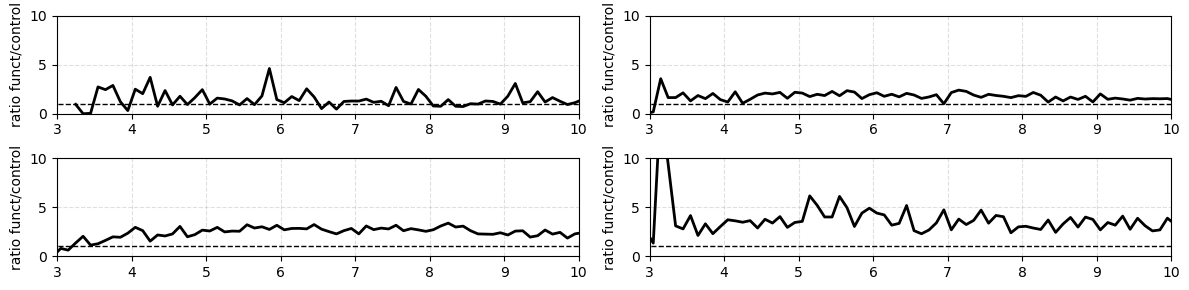

In [56]:
fig,axs=plt.subplots(2,2,figsize=(12,3))

for idx,ax in enumerate(axs.reshape(-1)):

    ax.plot(median_bins_hist_cluster,(real_funct_res_hist[:,idx]/shuffled_funct_res_hist[:,idx]),c='k',lw=2)
    ax.plot(median_bins_hist_cluster,np.ones(len(median_bins_hist_cluster)),c='black',lw=1,ls='--')
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(0,10)
    ax.set_xlim(3,10)
    ax.set_ylabel('ratio funct/control')
    #ax.set_yscale('log')
    ax.grid(axis='both',alpha=0.4,ls='--')
    ax.set_axisbelow(True)
    fig.tight_layout()
    
    #plt.savefig('../figures_esms//pr_cluster_funct_site_ratio.pdf')

## number of dSB cysteine

Information from running the script: human_proteome_analysis_stats.py (step 7)

48.836  DSB cysteines found out of 191888 (25,5%)



#### is cysteine in dsb

-->counting variants

Variant counts, examinated:  813523  out of : 813523

WT-type:  99431  - (  0.12222272756885792 % )

SBI:  165630  - (  0.20359596471150784 % )

total-loss:  548462  - (  0.6741813077196342 % )

-->counting residues

Residue counts, examinated:  42817  out of:  42817

Tolerant:  4772  - (  0.11145105915874536 % )

Functional:  7303  - (  0.17056309409813858 % )

Structural:  29700  - (  0.693649718569727 % )

#### no is cysteine in dsb

Variant counts, examinated:  3356464  out of : 3356464

WT-type:  1674137  - (  0.4987799660595198 % )

SBI:  859224  - (  0.2559908284432665 % )

total-loss:  823103  - (  0.24522920549721375 % )

-->counting residues

Residue counts, examinated:  176656  out of:  176656

Tolerant:  83120  - (  0.47051897473054977 % )

Functional:  40493  - (  0.22921950004528574 % )

Structural:  40963  - (  0.2318800380400326 % )
